<table style="width: 100%; border-style: none;">
<tr style="border-style: none">
<td style="border-style: none; width: 1%; font-size: 16px">Institut f&uuml;r Theoretische Physik<br /> Universit&auml;t zu K&ouml;ln</td>
<td style="border-style: none; width: 1%; font-size: 16px">&nbsp;</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 16px">Prof. Dr. Simon Trebst<br />Jan Attig</td>
</tr>
</table>
<hr>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Computerphysik</h1>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">&Uuml;bungsblatt 1</h1>
<hr>
<h3 style="font-weight:bold; text-align: center; margin: 0px; padding:0px; margin-bottom: 20px;">Sommersemester 2019</h3>

**Website:** [http://www.thp.uni-koeln.de/trebst/Lectures/2019-CompPhys.shtml](http://www.thp.uni-koeln.de/trebst/Lectures/2019-CompPhys.shtml)

**Abgabe**: Keine / Präsenzübung in der zweiten Vorlesungswoche (10.4.2019 - 12.4.2019)

**Besprechung**: 10.4.2019 - 12.4.2019

<table style="border-style: none; width: 100%"><tr style="border-style: none;">
<td style="border-style: none; width: 1%; font-size: 20px; font-weight: bold; text-align: left">Aufgaben auf &Uuml;bungsblatt 1</td>
<td style="border-style: none; width: 1%; text-align: right"></td></tr></table>


- Einstiegsaufgaben (Praesenzuebung)
- Fibonacci Zahlen  (Praesenzuebung)
- **Gumowski-Mira Attraktor**  (Praesenzuebung)

<table style="border-style: none; width: 100%"><tr style="border-style: none;">
<td style="border-style: none; width: 1%; font-size: 20px; font-weight: bold; text-align: left">Gumowski-Mira Attraktor</td>
<td style="border-style: none; width: 1%; text-align: right"></td></tr></table>

Wir betrachten ein **dynamisches System**, das einen zeitabhängigen Prozess beschreibt, dessen Entwicklung lediglich von der Wahl des Anfangszustands abhängt. Zu welchem Zeitpunkt der Prozess gestartet wird, ist jedoch unerheblich. Alle möglichen Zustände spannen den **Phasenraum** auf. Ein **Attraktor** ist eine Untermenge von Zuständen, die im Laufe der Zeit vom System angenommen werden. 

Wir betrachten ein Modell, dessen Phasenraum zweidimensional ist mit Koordinaten $(x, y)$. Außerdem besitzt das Modell drei Parameter $a, b, c$. Die Zeitentwicklung geschieht gemäß des folgenden Gesetz:

$\quad x_{n + 1} = y_n + a\cdot (1 + b\cdot y_n^2)\cdot y_n + f(x_n)$

$\quad y_{n + 1} = - x_n + f(x_{n + 1})$

Die Funktion $f(x)$ is gegeben durch

$\quad f(x) = c\cdot x + \dfrac{2\cdot(1 - c)\cdot x^2}{1 + x^2}$

Dieses Modell ist unter dem Namen **Gumowski-Mira Attraktor** bekannt. Ziel der Aufgabe wird es sein, eine Zeitreihe von $N$ Punkten nach der obigen Iterationsvorschrift zu generieren und danach zu visualisieren.


### Zerlegung in Teilschritte

Bei größeren und komplexeren Aufgaben ist es häufig sinnvoll, die Aufgabe in kleine Schritte zu zerlegen. Diese werden in sogenannten *Funktionen* zusammengefasst und können für sich genommen alleine definiert werden *ohne* dass der Rest des Codes geschrieben wurde. Wir möchten diese Aufgabe nutzen um Ihnen den Prozess des Aufteilens in kleine Schritte näher zu bringen und zu verdeutlichen.

### Einzelner Gumowski-Mira Schritt

Als ersten Schritt möchten wir eine Funktion schreiben, die nur **einen einzigen** Gumowski-Mira Iterationsschritt durchführt. Die Funktion bekommt sowohl die aktuellen Koordinaten $x$ und $y$, sowie die Parameter $a$,$b$ und $c$ sowie die Funktion $f$ übergeben. 

Ihre Aufgabe ist es, die Definition der neuen Koordinaten, benannt `new_x` und `new_y` so abzuändern, dass die korrekte Gumowski Mira Vorschrift implementiert ist. Am Schluss der Funktion werden diese Koordinaten dann zurückgegeben.

In [1]:
# one GM step
function gumowski_mira_step(
        x, y,
        a, b, c,
        f
    )
    
    # determine a new coordinate based on old coordinate
    new_x = y + a * (1. + b * y^2) * y + f(x)
    new_y = - x + f(new_x)
    
    # return the new coordinates
    return (new_x, new_y)
end

gumowski_mira_step (generic function with 1 method)

### Mehrere Gumowski-Mira Schritte und Bild erzeugen

Im Folgenden möchten wir nun das Kernstück des Codes schreiben, eine Funktion, die basierend auf den übergebenen Parametern ein Bild des Attraktors erzeugt (*aber noch nicht plottet oder anzeigt*). Dieses Bild wird in der Funktion als eine Matrix erzeugt und am Ende des Codes zurückgegeben.

Ihre Aufgabe ist es, den Code so zu erweitern, dass er $N$ Gumowski-Mira Schritte ausführt. Bei jedem Gumowski-Mira Schritt soll anschließend das entsprechende Pixel des Bildes (basierend auf den übergebenen Koordinatengrenzen) gefunden und um 1 erhöht werden.

*Hinweis:* Wenn Sie nicht wissen, wo Sie anfangen sollen, schreiben Sie die Anweisung zuerst Folge von Kommentaren in den Code und versuchen Sie nach und nach Ihre Kommentare in Code umzuwandeln.

In [2]:
# GM function
function gumowski_mira(
            x, y,
            a, b, c,
            min_x, max_x,
            min_y, max_y,
            resolution,
            N
        )
    
    # define the width and height of image
    width  = resolution
    height = resolution
    
    # construct the image
    image = zeros(Int64, width, height)
    
    
    
    # Define the GM update function
    f(x) = c * x + 2.0 * (1.0 - c) * x * x / (1.0 + x * x)
        
    # make steps
    for i in 1:N
        
        # determine a new coordinate based on old coordinate
        x, y = gumowski_mira_step(x, y, a,b,c,f)
        
        # find pixel in the image
        im_x = round(Int64, (x - min_x) / (max_x - min_x) * width)
        im_y = round(Int64, (y - min_y) / (max_y - min_y) * height)
        # check if it is INSIDE the image
        if 1<=im_x<=width && 1<=im_y<=height
            # if so, rais pixel by 1
            image[im_x, im_y] += 1
        end
        
    end
    
    
    
    # return the image
    return image
end

gumowski_mira (generic function with 1 method)

### Darstellen des Bildes

Für die Darstellung eines Gumowski-Mira Bildes haben wir Ihnen ein wenig Code zur Verfügung gestellt. Dieser benutzt die Plotting Bibliothek `PyPlot`, die letzten Endes die `python` Bibliothek `matplotlib` enthält.

In [3]:
# import library pyplot for plotting
using PyPlot
pygui(false); # switch between inline display (=false) and external window (=true)

# plotting a Gumowski Mira image
function plot_gumowski_mira(
            image
        )
    
    # make a new figure
    figure()
    
    # show the image
    imshow(log.(image), cmap="Spectral", interpolation="none")
    
    # turn off the axis
    gca().set_axis_off()
end

plot_gumowski_mira (generic function with 1 method)

### Testen der Implementierung und Erzeugung von Bildern

Wir möchten im Folgenden den gesamten Code testen. Dafür sollen zuerst die Parameter des Attraktors definiert werden. Danach sollen die Parameter an die Funktion `gumowski_mira` übergeben werden, um ein Bild zu erzeugen, das danach mit der Funktion `plot_gumowski_mira` angezeigt wird.

Schreiben Sie diesen Code, der die Parameter $a = 0.026, b=-0.034, c=-0.802095$ sowie $(x_0, y_0) = (0.1, 0.1)$ als initiale Koordinate benutzt. Verwenden Sie $N = 1.000.000$ Iterationsschritte im Bereich $(x, y) \in (-18, 22)\times (-14, 12)$.

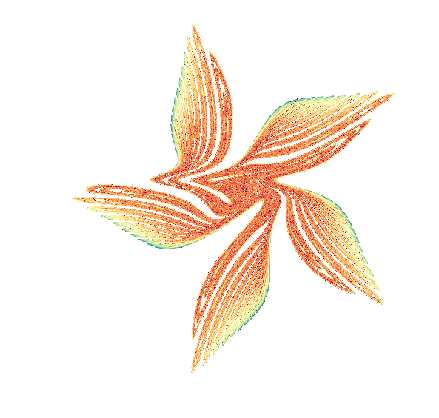

In [4]:
# Define paramters
a = 0.026
b = - 0.034
c = - 0.802095

# Define starting position
x0 = 0.1
y0 = 0.1

# Define number of iteratiosn
N = 1000000

# Define image boundaries
x_min = -18
x_max = 22
y_min = -14
y_max = 12


# obtain the filled image with gumowski mira
image = gumowski_mira(x0, y0, a,b,c, x_min,x_max, y_min,y_max, 500, N)

# plot the image
plot_gumowski_mira(image)

Erzeugen Sie einen zweiten Code, der die Parameter $a = -0.05, b=0.005, c=-0.495$ sowie $(x_0, y_0) = (0.085, 0.085)$ als initiale Koordinate benutzt. Nutzen Sie $N = 1.000.000$ Iterationsschritte im Bereich $(x, y) \in (-12, 16)\times (-15, 8)$.

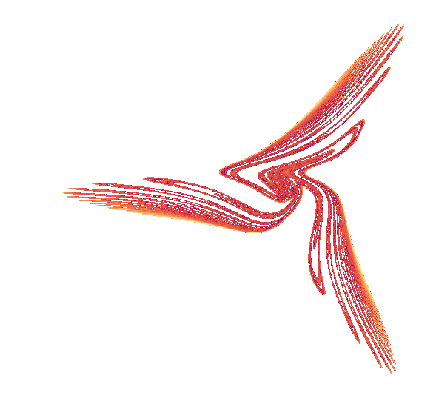

In [5]:
# Define paramters
a = -0.05 
b = 0.005
c = -0.495

# Define starting position
x0 = 0.085
y0 = 0.085

# Define number of iteratiosn
N = 1000000

# Define image boundaries
x_min = -12
x_max = 16
y_min = -15
y_max = 8


# obtain the filled image with gumowski mira
image = gumowski_mira(x0, y0, a,b,c, x_min,x_max, y_min,y_max, 500, N)

# plot the image
plot_gumowski_mira(image)